In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

In [3]:
ross_df = pd.read_csv('./datasets/train.csv', low_memory=False)
store_df = pd.read_csv('./datasets/store.csv')
test_df = pd.read_csv('./datasets/test.csv')
submission_df = pd.read_csv('./datasets/sample_submission.csv')

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [6]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [9]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
# Working with dates
def modify_dates(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

In [11]:
modify_dates(merged_df)
modify_dates(merged_test_df)

In [12]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


We notice that the sales of the stores is 0 if the store is closed.
So we need to remove the rows when the store is closed

In [13]:
# Store open/closed status
merged_df[merged_df['Open']==0]['Sales'].value_counts()

Sales
0    172817
Name: count, dtype: int64

In [14]:
# Removing the stores that are closed
merged_df = merged_df[merged_df['Open']!=0]

### Calculating Competition

Since the competition info is divided into years and months, it is better to calculate the total competition in months and also impute the neccessary data

In [15]:
# Find information about the Competition
def compete_months(df):
    df['CompetitionOpen'] = 12 * (df['Year']-df['CompetitionOpenSinceYear']) + (df['Month']-df['CompetitionOpenSinceMonth'])

    # Imputing negative values and missing values with 0
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x>=0 else 0).fillna(0)

In [16]:
compete_months(merged_df)
compete_months(merged_test_df)

merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\4002892834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = 12 * (df['Year']-df['CompetitionOpenSinceYear']) + (df['Month']-df['CompetitionOpenSinceMonth'])
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\4002892834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x>=0 else 0).fillna(0)


,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
514643,2014-03-27,38630.0,2012.0,9.0,18.0
528959,2014-03-14,2290.0,2014.0,12.0,0.0
297957,2014-10-27,9430.0,NaN,NaN,0.0
165736,2015-03-05,310.0,NaN,NaN,0.0
139358,2015-03-29,200.0,2013.0,4.0,23.0
428469,2014-06-13,690.0,2007.0,6.0,84.0
793399,2013-07-20,2470.0,2005.0,2.0,101.0
838217,2013-06-10,50.0,2013.0,11.0,0.0
449837,2014-05-24,1480.0,2009.0,4.0,61.0
280643,2014-11-14,2240.0,2013.0,5.0,18.0


### Deciphering Promo2 details

The promo2 details are also specified in years and weeks. Also promo2 is open only on **specific intervals/months of the year**.
The promo2 details need to be clearly separated out for the model to predict correctly

In [17]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [18]:
def check_promo_month(row):
    month_dict = {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr', 
    5: 'May', 
    6: 'Jun', 
    7: 'Jul', 
    8: 'Aug', 
    9: 'Sep', 
    10: 'Oct', 
    11: 'Nov', 
    12: 'Dec'
}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month_dict[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception as e:
        return 0
    
def promo2_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12*(df['Year']-df['Promo2SinceYear']) + (df['WeekOfYear']-df['Promo2SinceWeek'])*7/30.5
    df['Promo2Open'].fillna(0, inplace=True)
    df['Promo2Open'] = df['Promo2Open'].apply(lambda x: x if x>=0 else 0)*df['Promo2']

    # Check if the promo2 is running for the current month
    df['IsPromo2Month'] = df.apply(lambda row: check_promo_month(row), axis=1)*df['Promo2']

In [19]:
promo2_cols(merged_df)
promo2_cols(merged_test_df)

C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\1355774554.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'] = 12*(df['Year']-df['Promo2SinceYear']) + (df['WeekOfYear']-df['Promo2SinceWeek'])*7/30.5
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\1355774554.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'].fillna(0, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\1355774554.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## Deciding the Input ans Target columns

In [20]:
merged_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [21]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'StateHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2Open', 'IsPromo2Month']
target_cols = 'Sales'

In [22]:
inputs = merged_df[input_cols]
targets = merged_df[target_cols]

In [23]:
test_inputs = merged_test_df[input_cols]

In [24]:
num_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear']
cat_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute Missing numerical data

In [25]:
inputs[num_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [26]:
test_inputs[num_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [27]:
max_dist = inputs['CompetitionDistance'].max()

# Filling the missing values with the max of the 'CompetitionDistance' column
inputs['CompetitionDistance'].fillna(max_dist, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_dist, inplace=True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2036008213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['CompetitionDistance'].fillna(max_dist, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2036008213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['CompetitionDistance'].fillna(max_dist, inplace=True)


### Scaling Numeric Values

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(inputs[num_cols])

MinMaxScaler()

In [29]:
inputs[num_cols] = scaler.transform(inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2231947006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[num_cols] = scaler.transform(inputs[num_cols])
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2231947006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])


### Encoding Categorical Columns

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(inputs[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [31]:
inputs[encoded_cols] = encoder.transform(inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2623792823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[encoded_cols] = encoder.transform(inputs[cat_cols])
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2623792823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[encoded_cols] = encoder.transform(inputs[cat_cols])
C:\Users\ROG\AppData\Local\Temp\ipykernel_29160\2623792823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [32]:
X = inputs[num_cols + encoded_cols]
X_test = test_inputs[num_cols + encoded_cols]

## Using Gradient Boosting Machines

In [33]:
from xgboost import XGBRegressor 

In [34]:
model  = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [35]:
%%time
model.fit(X, targets)

CPU times: total: 3.02 s
Wall time: 1.76 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
gbm_preds = model.predict(X)

gbm_preds

array([ 7960.0273,  7581.6953,  7993.1504, ...,  7102.0664,  8724.751 ,
       10748.863 ], dtype=float32)

### Evaluating the model

In [37]:
from sklearn.metrics import root_mean_squared_error

def rmse(a,b):
    return root_mean_squared_error(a, b)

rmse(targets, gbm_preds)

2397.194095204547

### Comparing with a Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=42, n_jobs=-1)

In [39]:
rf.fit(X, targets)

RandomForestRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [40]:
rf_preds = rf.predict(X)

rmse(targets, rf_preds)

2706.3224633134428

## Visualization


<Axes: >

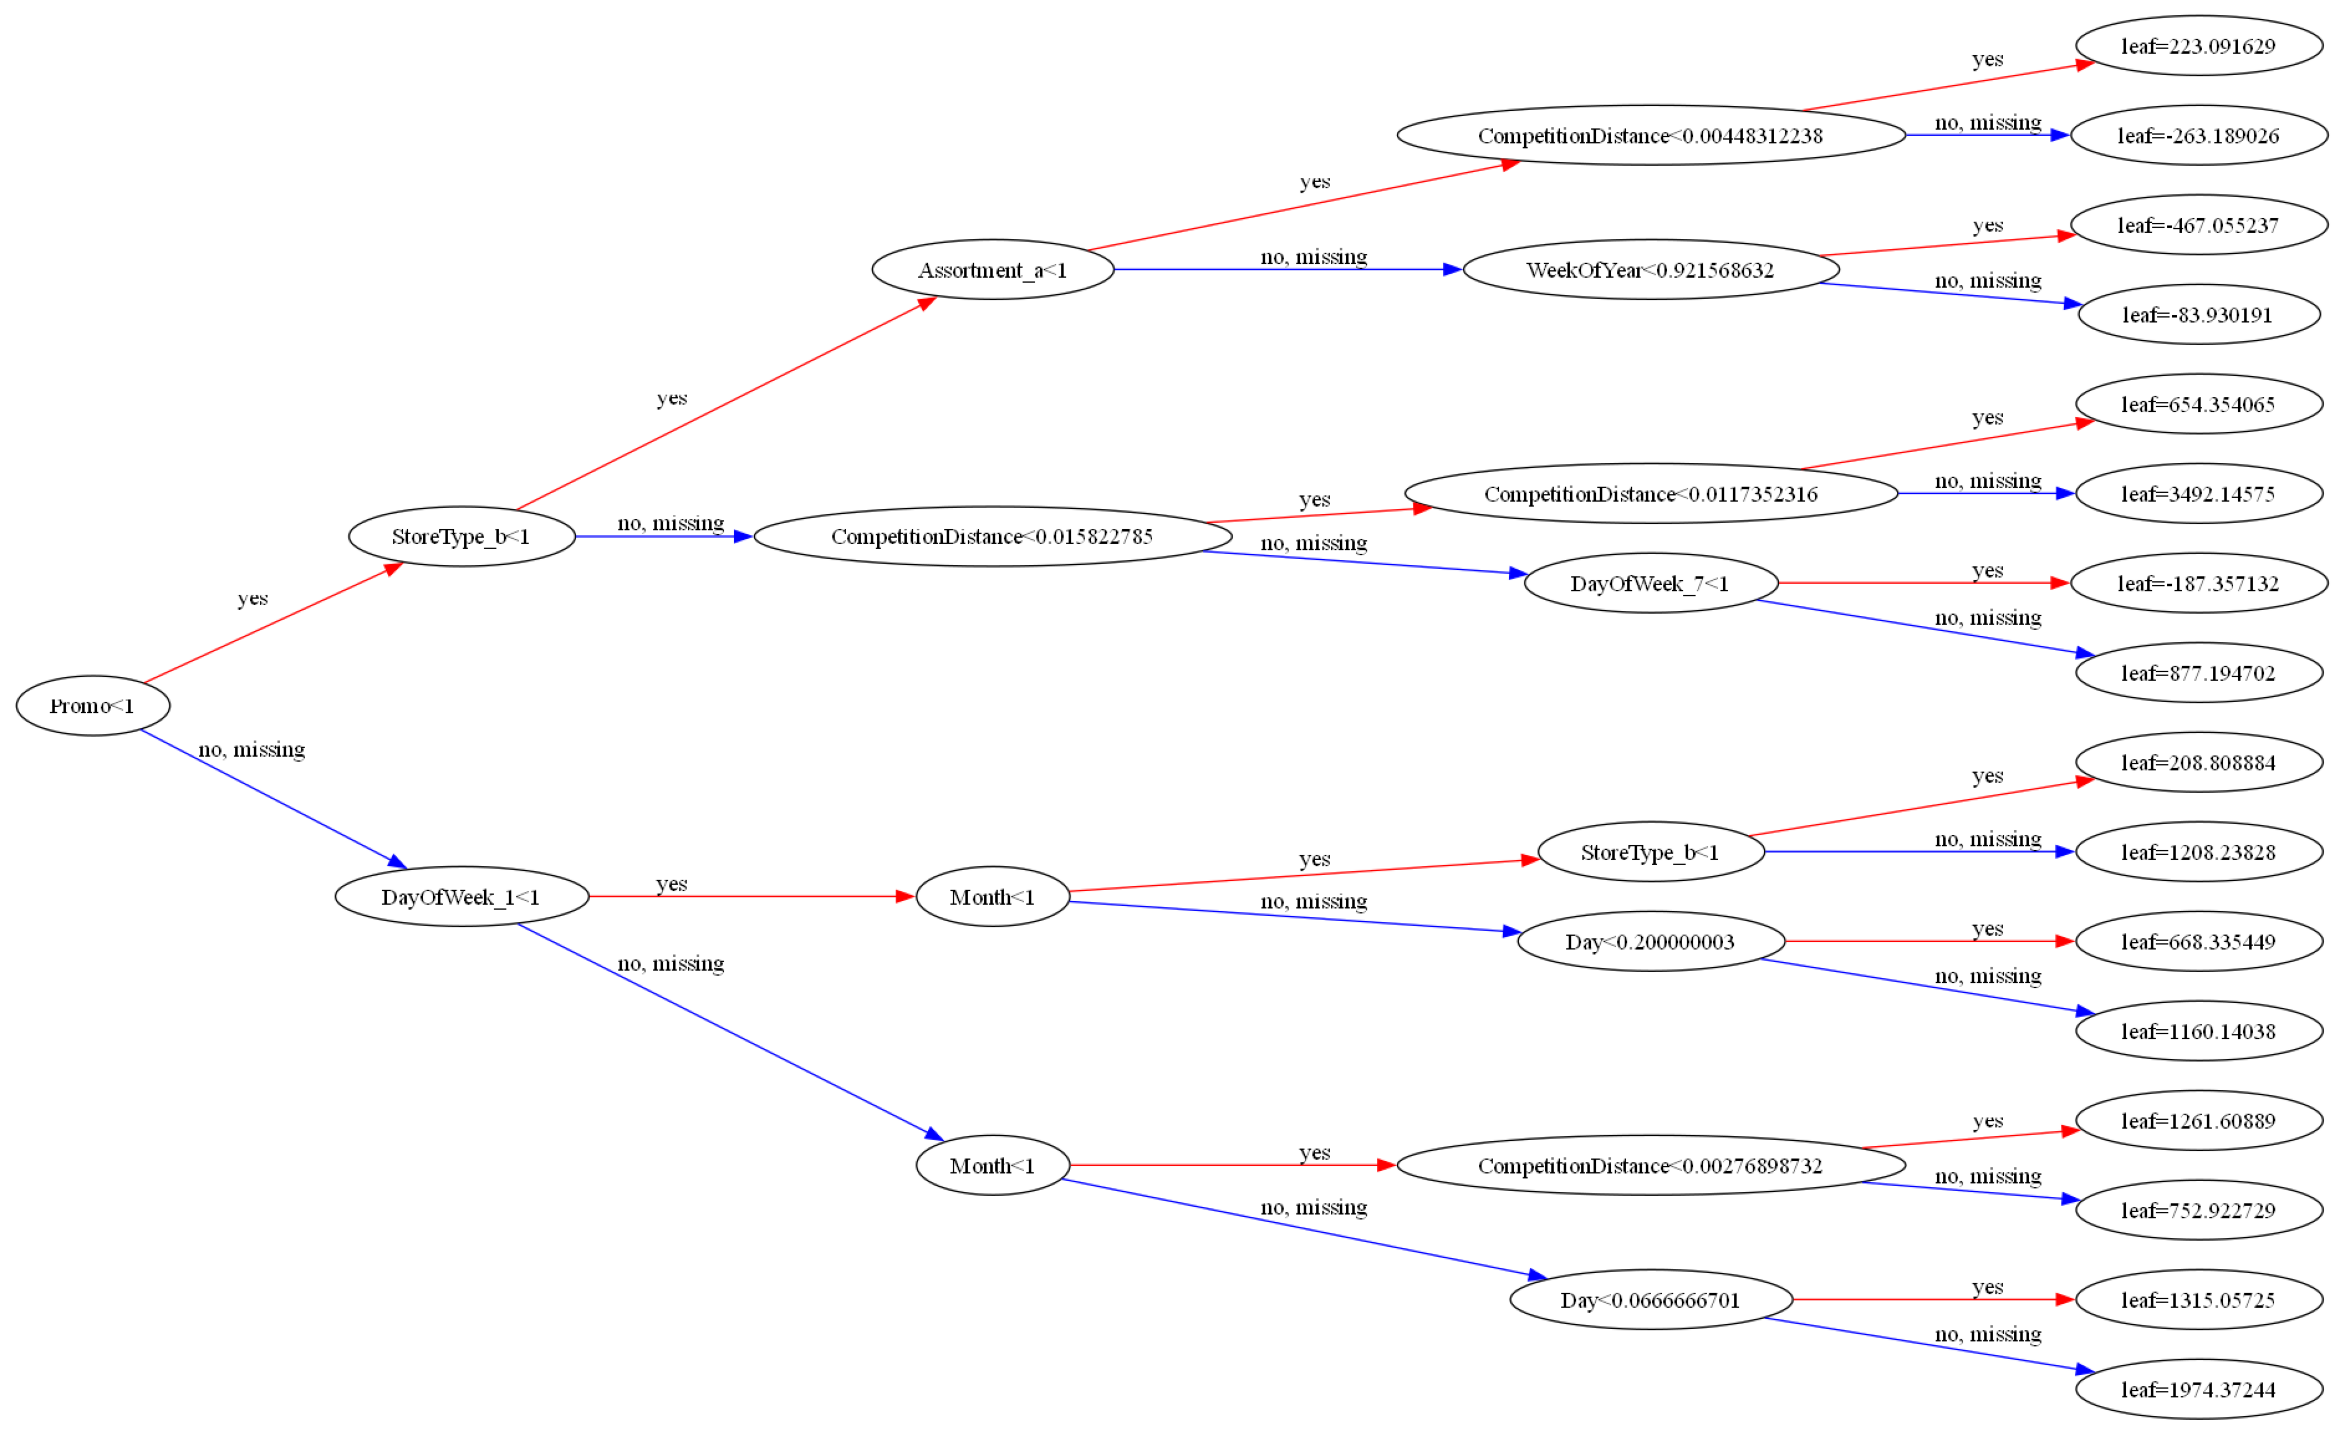

In [41]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=30, 30

plot_tree(model, rankdir='LR', num_trees=0)

#### Visualizing the last tree 
This helps us to view how the GBM has worked to reduce the error from the 1st tree to the 19th tree

<Axes: >

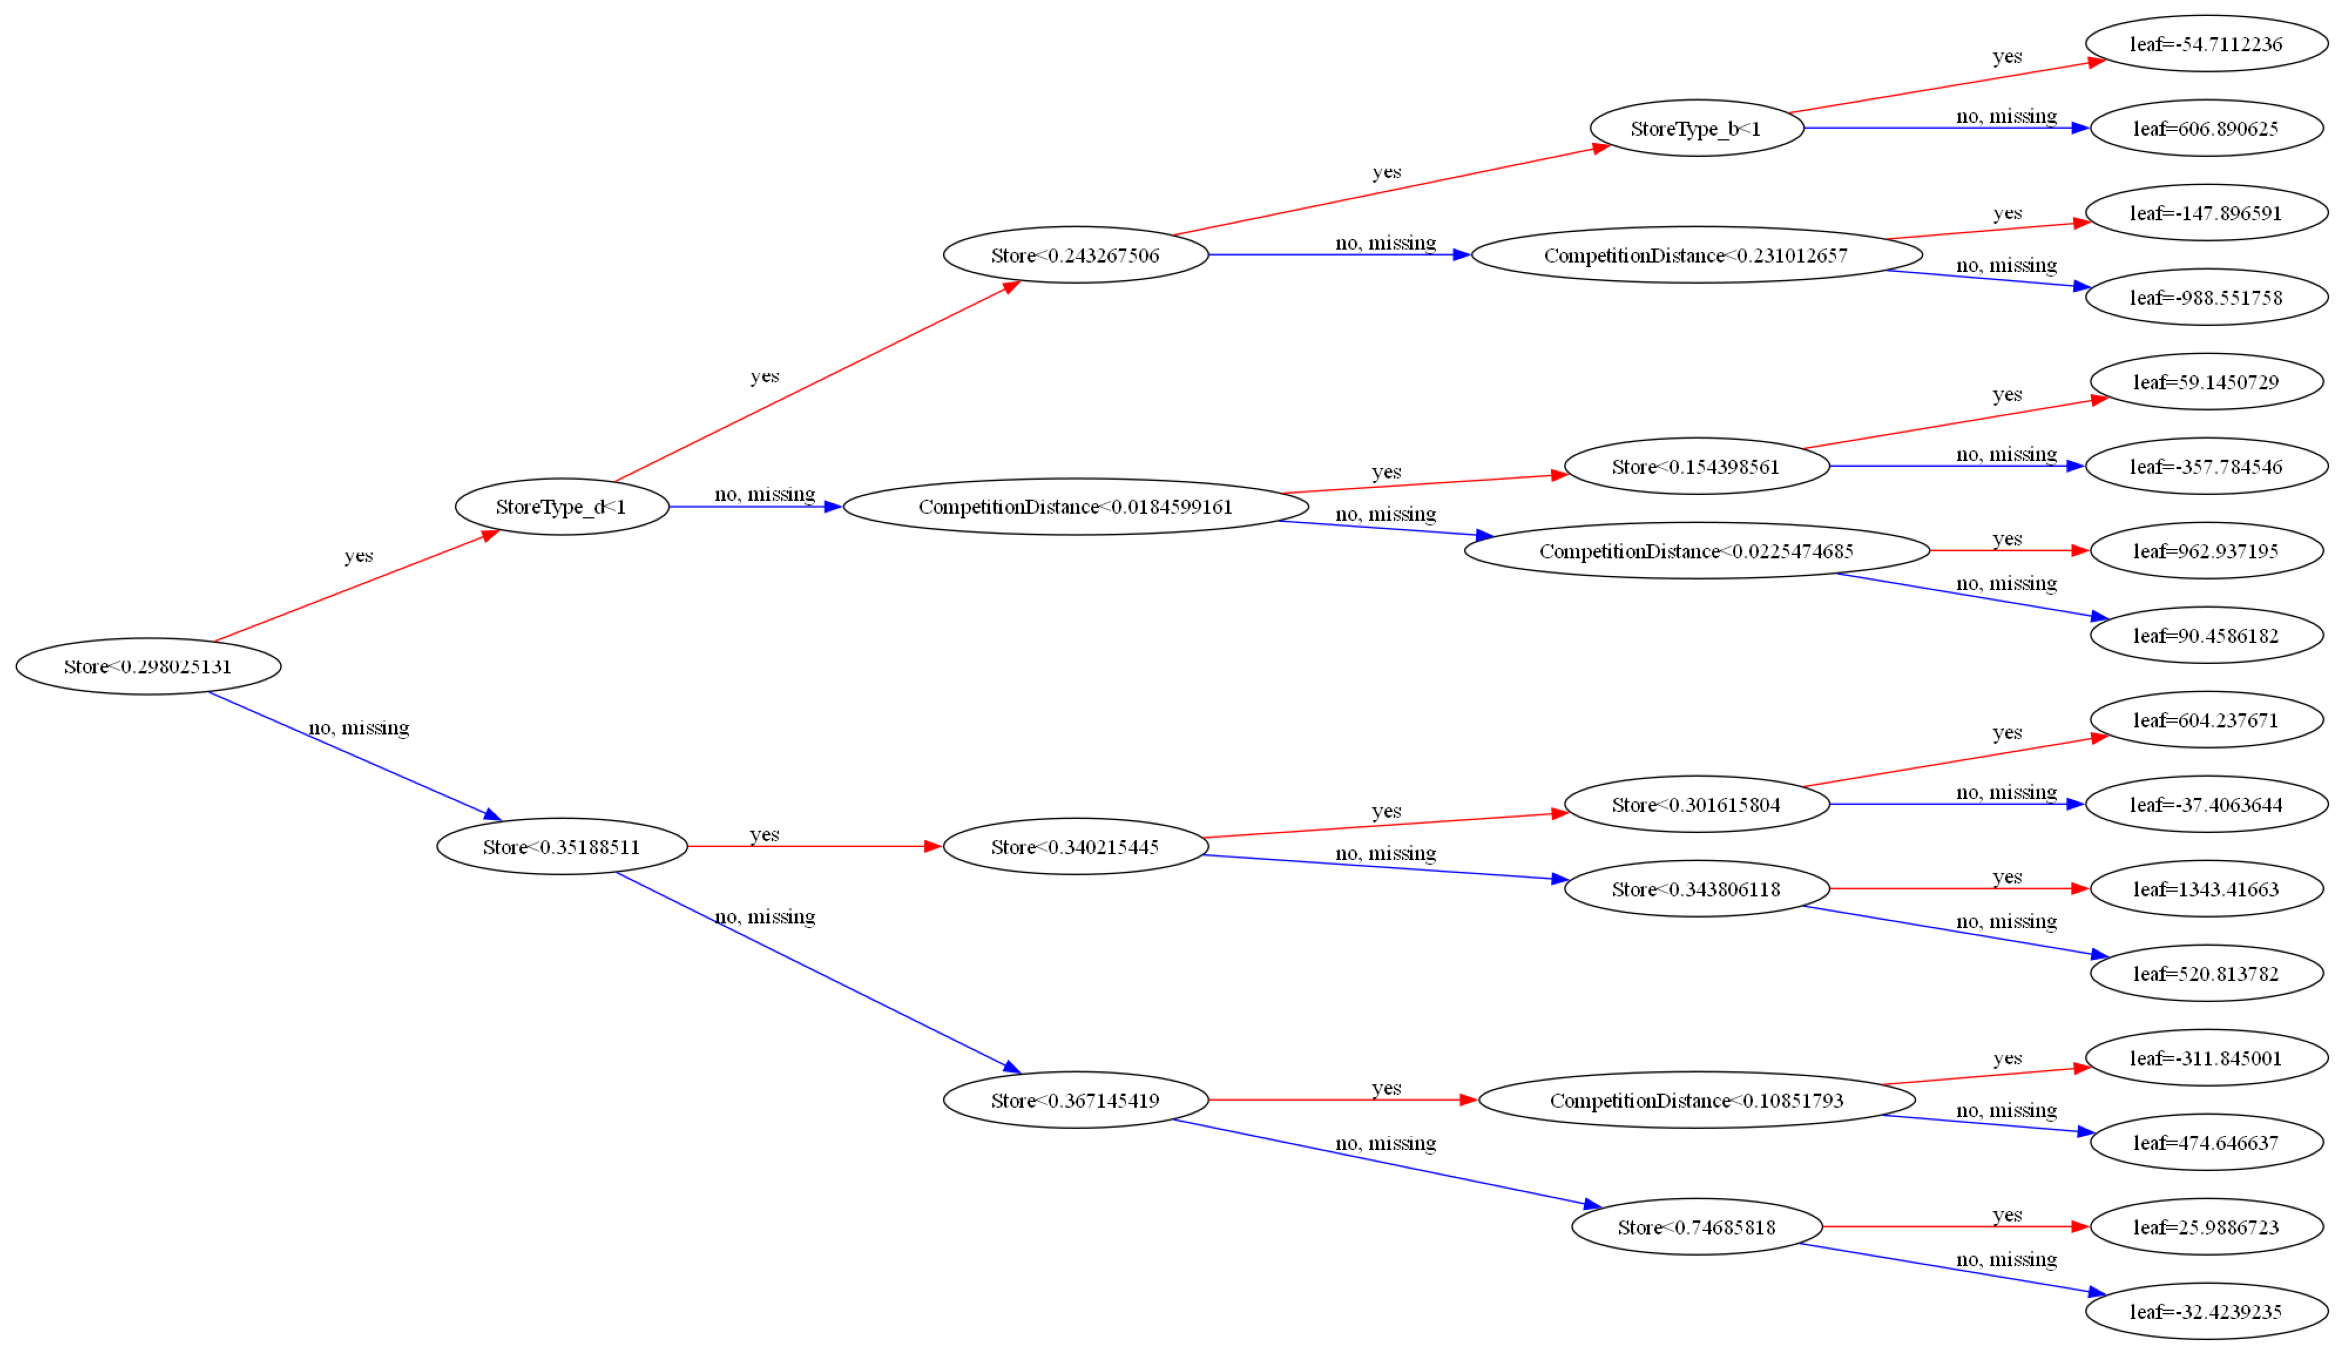

In [42]:
plot_tree(model, rankdir='LR', num_trees=19)

### Feature Importance

In [43]:
importance_df = pd.DataFrame(
    {
        'feature' : X.columns,
        'importance' : model.feature_importances_
    }
).sort_values('importance', ascending=False)

In [44]:
importance_df.head(10)

,feature,importance
1,Promo,0.319169
12,DayOfWeek_1,0.077843
24,StoreType_b,0.070759
5,Promo2,0.053933
26,StoreType_d,0.052074
9,Month,0.036868
27,Assortment_a,0.035399
11,WeekOfYear,0.035368
29,Assortment_c,0.034871
3,CompetitionDistance,0.032024


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

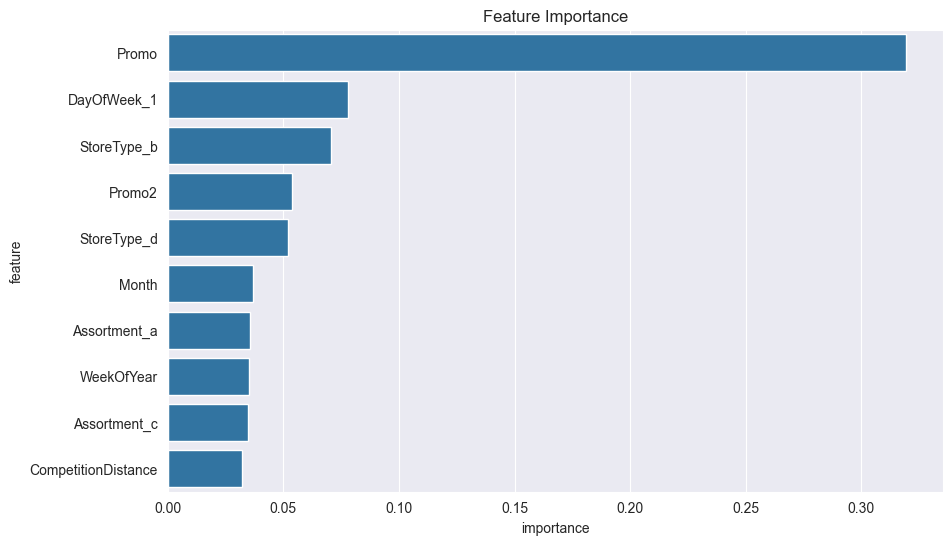

In [45]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x='importance', y='feature')

## K-Fold Cross Validation

In [46]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
def train_and_eval(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [48]:
models = []
rmse_values = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_eval(X_train, train_targets, X_val, val_targets, max_depth=4, n_estimators=20)
    models.append(model)
    rmse_values.append((train_rmse, val_rmse))

for (train_rmse, val_rmse) in rmse_values:
    print(f'Train RMSE: {train_rmse}, Val RMSE: {val_rmse}')

Train RMSE: 2380.3481323008373, Val RMSE: 2378.223937442127
Train RMSE: 2356.0484116381726, Val RMSE: 2358.119123876376
Train RMSE: 2360.6478399401462, Val RMSE: 2364.531784301832
Train RMSE: 2380.427921164323, Val RMSE: 2387.667463489733
Train RMSE: 2390.063349236867, Val RMSE: 2392.318180864833


Finding the average of all predictions of all the 5 models


In [49]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [50]:
preds = predict_avg(models, X)
preds

array([ 7829.06  ,  7362.5767,  8529.232 , ...,  7286.0596,  7952.5063,
       10264.44  ], dtype=float32)

### HyperParameter Tuning and Regularization


In [51]:
# Testing the hyperparameters and returns rmse values
def test_params(**params):
    rmse_vals, models = [],[]
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_eval(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        rmse_vals.append((train_rmse, val_rmse))
    mean_train_rmse = np.mean([t[0] for t in rmse_vals])
    mean_val_rmse = np.mean([t[1] for t in rmse_vals])
    print(f'Train RMSE: {mean_train_rmse}, Val RMSE: {mean_val_rmse}')
    return (mean_train_rmse, mean_val_rmse)

In [52]:
# Visualization graph
def plot_params(x1,x2,y,param_title):
    plt.figure(figsize=(10,6))
    plt.plot(y,x1, label='Train', color='green')
    plt.plot(y,x2, label='val', color='orange')
    plt.xlabel(param_title)
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('RMSE vs parameters')
    plt.show()

#### n_estimators
Number of gradient boost trees. Equivalent to the number of boosting rounds

In [53]:
n_estimators = np.arange(10, 2000, 500)
rmse_vals=[]
for n in n_estimators:
    print(f'n_estimators: {n}')
    curr_rmse = test_params(n_estimators=n)
    rmse_vals.append(curr_rmse)

n_estimators: 10
Train RMSE: 2348.2522228041257, Val RMSE: 2350.2432955838303
n_estimators: 510
Train RMSE: 758.7925833952546, Val RMSE: 798.1460319193161
n_estimators: 1010
Train RMSE: 662.261900899703, Val RMSE: 727.2884919775843
n_estimators: 1510
Train RMSE: 612.808627221987, Val RMSE: 698.5547442005953


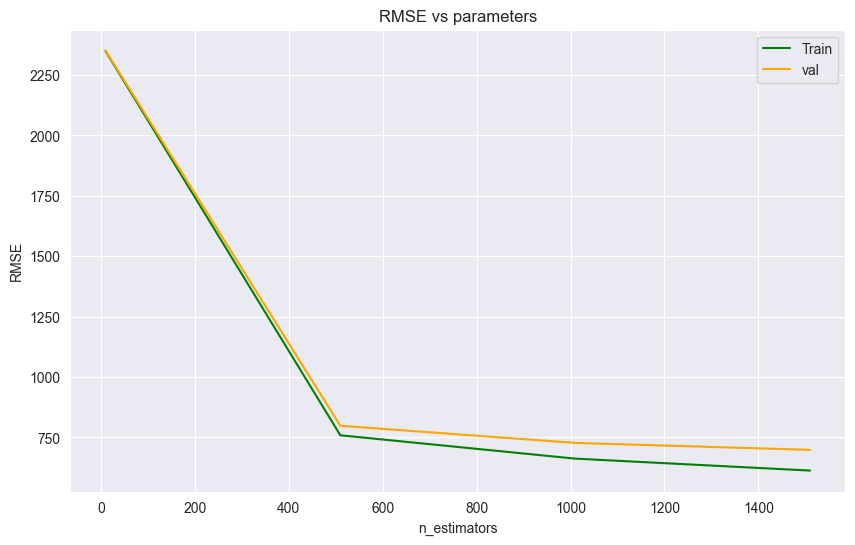

In [54]:
plot_params([t[0] for t in rmse_vals], [t[1] for t in rmse_vals], n_estimators, 'n_estimators')

#### max_depth
Maximum tree depth for base learners.

In [55]:
max_depth = np.arange(2,20,2)
rmse_vals=[]
for depth in max_depth:
    print(f'max_depth: {depth}')
    curr_depth = test_params(max_depth=depth)
    rmse_vals.append(curr_depth)

max_depth: 2
Train RMSE: 2383.516182402992, Val RMSE: 2384.6860337902153
max_depth: 4
Train RMSE: 1731.8433079070085, Val RMSE: 1736.382749709063
max_depth: 6
Train RMSE: 1155.319835054763, Val RMSE: 1167.025854827205
max_depth: 8
Train RMSE: 855.559695032973, Val RMSE: 893.680254358075
max_depth: 10
Train RMSE: 661.8743168020085, Val RMSE: 775.5334011370057
max_depth: 12
Train RMSE: 503.1545338204522, Val RMSE: 744.6621921735235
max_depth: 14
Train RMSE: 353.9775566723893, Val RMSE: 772.6852767917583
max_depth: 16
Train RMSE: 209.1184858575072, Val RMSE: 825.4685416191696
max_depth: 18
Train RMSE: 96.62726469460836, Val RMSE: 878.3642592024156


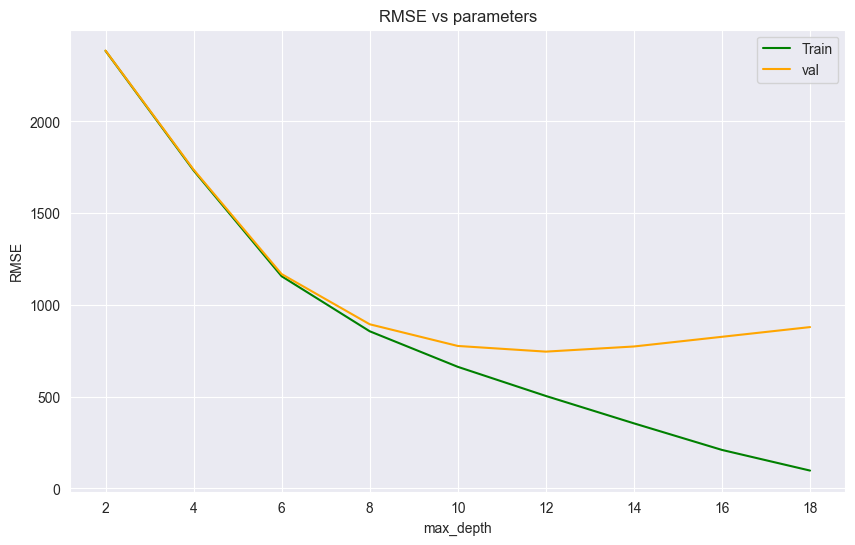

In [56]:
plot_params([t[0] for t in rmse_vals], [t[1] for t in rmse_vals], max_depth, 'max_depth')

#### learning_rate


In [57]:
learning_rate = np.arange(0.1, 1.0, 0.2)
rmse_vals=[]
for rate in learning_rate:
    print(f'Learning Rate:{rate}')
    curr_rate = test_params(n_estimators=50, max_depth=12, learning_rate=rate)
    rmse_vals.append(curr_rate)

Learning Rate:0.1
Train RMSE: 1225.5642284815922, Val RMSE: 1311.3886254270396
Learning Rate:0.30000000000000004
Train RMSE: 646.1698870940692, Val RMSE: 810.8080355045619
Learning Rate:0.5000000000000001
Train RMSE: 579.7306849543982, Val RMSE: 817.07658697702
Learning Rate:0.7000000000000001
Train RMSE: 550.4252683672203, Val RMSE: 858.875846405637
Learning Rate:0.9000000000000001
Train RMSE: 528.0289574637767, Val RMSE: 895.0701299562625


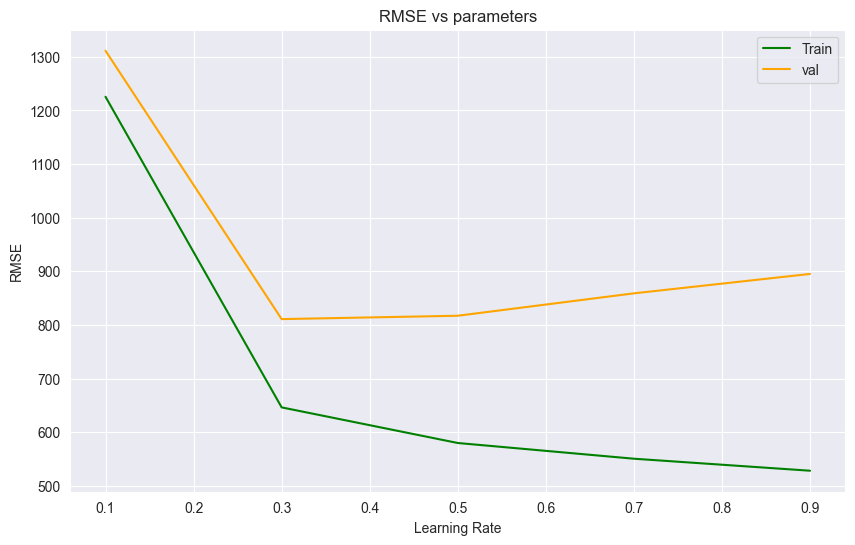

In [58]:
plot_params([t[0] for t in rmse_vals], [t[1] for t in rmse_vals], learning_rate, 'Learning Rate')

#### booster

Using a linear regression booster rather than decision trees


In [59]:
test_params(booster='gblinear')

Train RMSE: 2726.514188372307, Val RMSE: 2726.674407576668


(2726.514188372307, 2726.674407576668)

## Final Predictions

In [60]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=1000, max_depth=12, learning_rate=0.3)

In [61]:
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
test_preds = model.predict(X_test)

test_preds

array([ 3821.2283,  8618.556 ,  9749.902 , ...,  7859.1016, 23905.795 ,
        8478.244 ], dtype=float32)

In [65]:
submission_df['Sales'] = test_preds
submission_df

,Id,Sales
0,1,3821.228271
1,2,8618.555664
2,3,9749.902344
3,4,7462.060547
4,5,7009.521484
...,...,...
41083,41084,3283.965820
41084,41085,7553.282227
41085,41086,7859.101562
41086,41087,23905.794922


In [66]:
submission_df.to_csv('submission.csv', index=False)